In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("knn_telecom.csv")


In [34]:
# Remove ID columns if present
df = df.loc[:, ~df.columns.str.lower().str.contains("id")]

# --------------------------------------------------
# 2. Handle Missing Values Properly
# --------------------------------------------------
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [35]:
# --------------------------------------------------
# 3. Separate Features and Target
# --------------------------------------------------
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [36]:
# --------------------------------------------------
# 4. Identify Column Types
# --------------------------------------------------
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [37]:
# --------------------------------------------------
# 5. Create Preprocessing Transformer
# --------------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [38]:
# --------------------------------------------------
# 6. Cross Validation Setup
# --------------------------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = range(1, 16)
cv_scores = []

In [39]:
# --------------------------------------------------
# 7. Train and Evaluate for Different K Values
# --------------------------------------------------
for k in k_values:

    model = Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])

    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    cv_scores.append(scores.mean())

    print(f"K = {k}, Accuracy = {scores.mean():.4f}")

K = 1, Accuracy = 0.9533
K = 2, Accuracy = 0.9333
K = 3, Accuracy = 0.9600
K = 4, Accuracy = 0.9600
K = 5, Accuracy = 0.9600
K = 6, Accuracy = 0.9667
K = 7, Accuracy = 0.9667
K = 8, Accuracy = 0.9533
K = 9, Accuracy = 0.9533
K = 10, Accuracy = 0.9600
K = 11, Accuracy = 0.9600
K = 12, Accuracy = 0.9600
K = 13, Accuracy = 0.9600
K = 14, Accuracy = 0.9600
K = 15, Accuracy = 0.9600


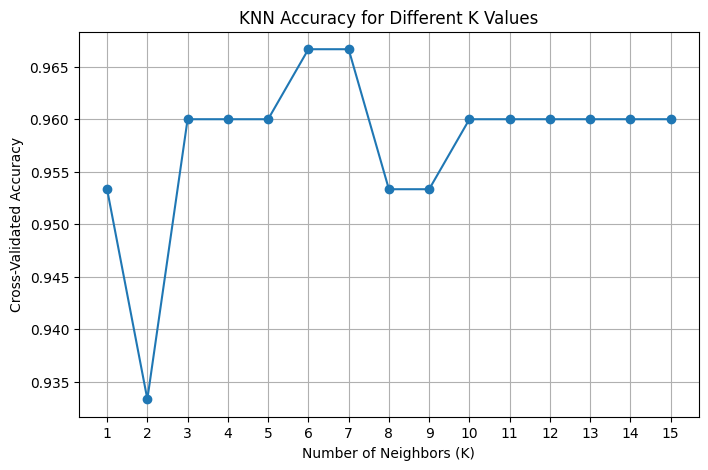

In [40]:
# --------------------------------------------------
# 8. Plot Results
# --------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [41]:
# --------------------------------------------------
# 9. Best K
# --------------------------------------------------
best_k = k_values[np.argmax(cv_scores)]
print("\nBest K:", best_k)
print("Best Accuracy:", max(cv_scores))


Best K: 7
Best Accuracy: 0.9666666666666668


In [42]:
final_model = Pipeline( steps=[
    ("preprocessing", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))]
)

final_model.fit(X, y)

# --------------------------------------------------
# 8. User Input Prediction
# --------------------------------------------------

# Modify values as required
user_data = {
    "Age": 40,
    "Gender": "Male",
    "PlanType": "Premium",
    "Tenure": 12,
    "MonthlyUsage": 350
}

user_df = pd.DataFrame([user_data])

prediction = final_model.predict(user_df)[0]
probability = final_model.predict_proba(user_df)[0]

print("\nUser Input:")
print(user_df)

print("\nPredicted Churn:", prediction)
print("Prediction Probability:", probability)


User Input:
   Age Gender PlanType  Tenure  MonthlyUsage
0   40   Male  Premium      12           350

Predicted Churn: 1
Prediction Probability: [0.42857143 0.57142857]
